In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('quora_duplicate_questions.csv')

In [3]:
df.head()


,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
4,4,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1


In [6]:
df.drop(columns={'index'},inplace=True)

In [7]:
df.shape

(345036, 6)

In [8]:
new_df = df.sample(30000,random_state=2)


In [9]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
new_df.duplicated().sum()

0

is_duplicate
0    18175
1    11825
Name: count, dtype: int64
is_duplicate
0    60.583333
1    39.416667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

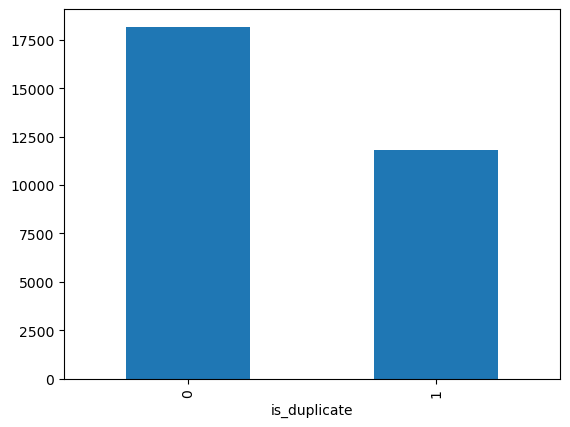

In [11]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59838
Number of questions getting repeated 148


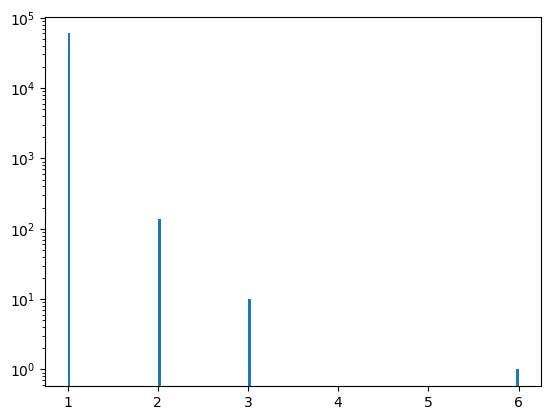

In [13]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [14]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [15]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0,46,40
99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1,65,47
175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1,25,44
268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0,60,64
232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0,81,61


In [16]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0,46,40,10,9
99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1,65,47,9,8
175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1,25,44,5,8
268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0,60,64,12,12
232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0,81,61,15,11


In [17]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [18]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0,46,40,10,9,4
99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1,65,47,9,8,6
175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1,25,44,5,8,1
268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0,60,64,12,12,2
232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0,81,61,15,11,8


In [19]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [20]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0,46,40,10,9,4,19
99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1,65,47,9,8,6,16
175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1,25,44,5,8,1,13
268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0,60,64,12,12,2,24
232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0,81,61,15,11,8,26


In [21]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0,46,40,10,9,4,19,0.21
99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1,65,47,9,8,6,16,0.38
175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1,25,44,5,8,1,13,0.08
268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0,60,64,12,12,2,24,0.08
232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0,81,61,15,11,8,26,0.31


minimum characters 1
maximum characters 310
average num of characters 54


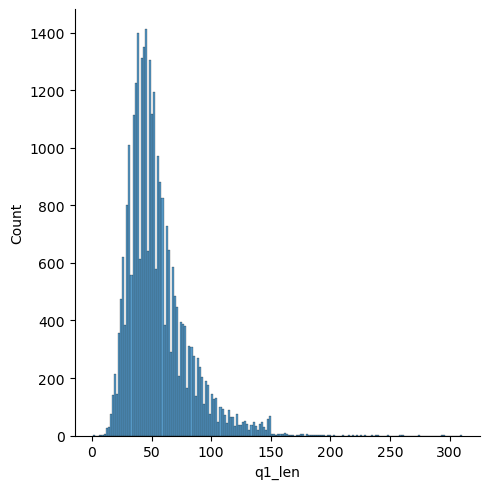

In [24]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 4
maximum characters 307
average num of characters 54


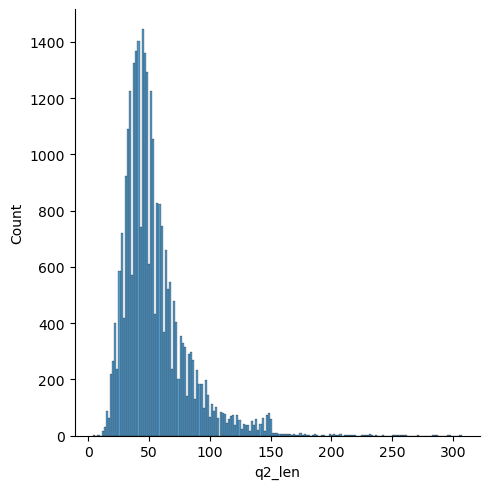

In [25]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 66
average num of words 10


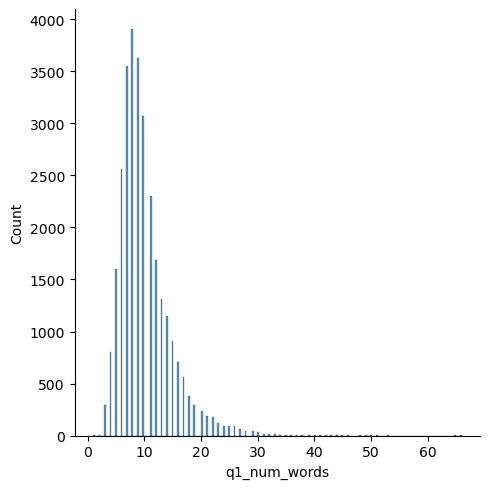

In [26]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 63
average num of words 10


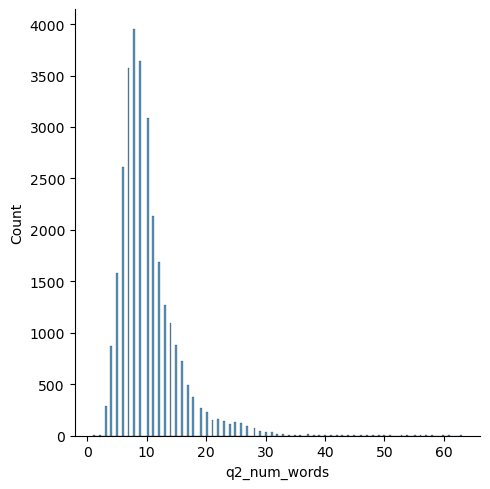

In [27]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

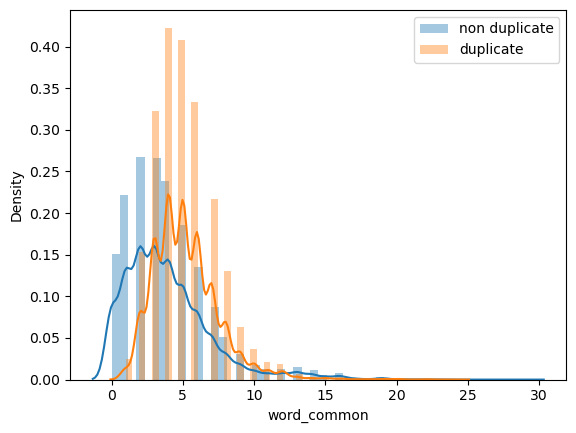

In [28]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

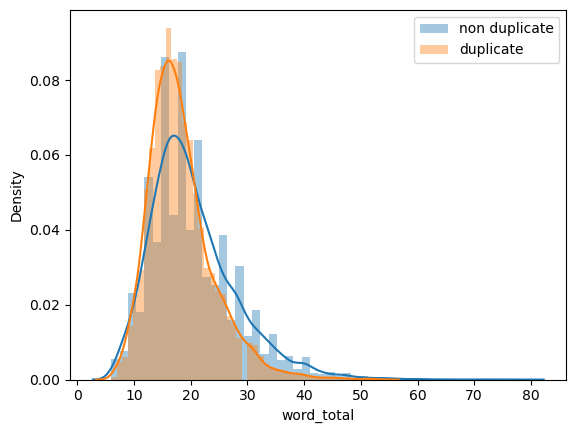

In [29]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

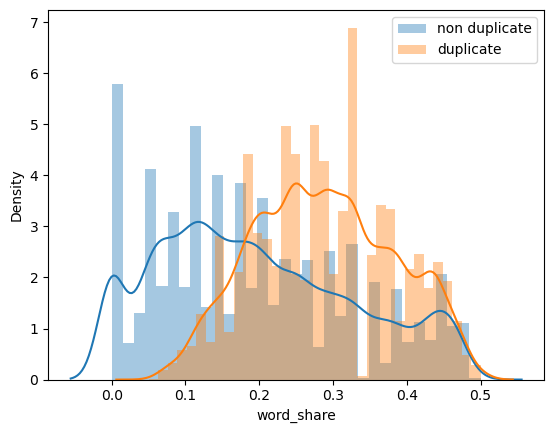

In [30]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [31]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
297803,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?
99927,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?
175435,How do you serve pierogi?,What are some great ways to serve pierogies?
268694,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...
232503,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...


In [32]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
297803,0,46,40,10,9,4,19,0.21
99927,1,65,47,9,8,6,16,0.38
175435,1,25,44,5,8,1,13,0.08
268694,0,60,64,12,12,2,24,0.08
232503,0,81,61,15,11,8,26,0.31


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [34]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [35]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
297803,0,46,40,10,9,4,19,0.21,0,1,...,0,0,0,0,0,0,0,0,0,0
99927,1,65,47,9,8,6,16,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0
175435,1,25,44,5,8,1,13,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
268694,0,60,64,12,12,2,24,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
232503,0,81,61,15,11,8,26,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred) bn bgfgvbt

0.7591666666666667

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7578333333333334